# EARTHQUAKES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import matplotlib.animation as animation
from IPython.display import HTML
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
import io
import base64

try:
    data = pd.read_csv('../input/database.csv', index_col = 0, parse_dates = True)
    print('File load: Success')
except:
    print('File load: Failed')

File load: Success


In [2]:
data = data.dropna(axis = 1)
data['Year'] = data.index.year

In [3]:
data.Type.value_counts()

Earthquake           23232
Nuclear Explosion      175
Explosion                4
Rock Burst               1
Name: Type, dtype: int64

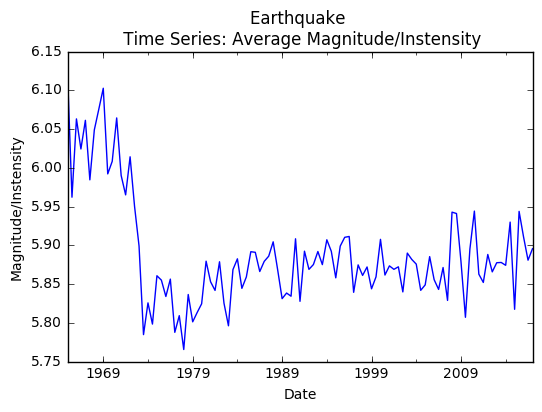

In [4]:
def average_mag(Type, time_frame):
    data["Magnitude"][data.Type == Type].resample(time_frame).mean().plot()
    plt.title("{} \n Time Series: Average Magnitude/Instensity".format(Type))
    plt.ylabel("Magnitude/Instensity")
average_mag('Earthquake', '6M')

** I would think that the above graph is really showing the advance in technology, and the ability for seismic equipment to pick up smaller earthquakes, after the 1970's**

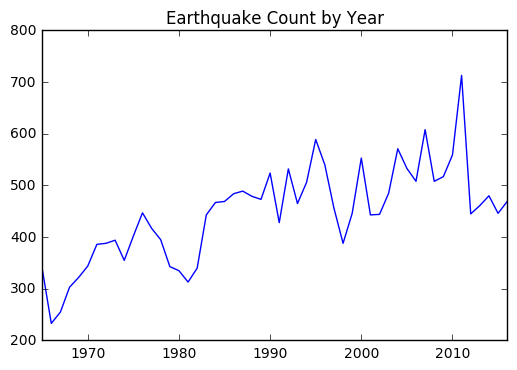

In [5]:
def by_year(Type, graph_type = 'line'):
    data["Year"][data.Type == Type].value_counts().sort_index().plot(kind = graph_type)
    plt.title('{} Count by Year'.format(Type))
by_year('Earthquake')

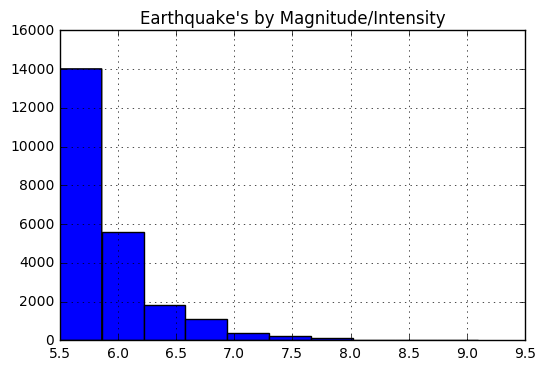

In [6]:
def hist(Type):
    data[data.Type == Type].hist('Magnitude')
    plt.title("{}'s by Magnitude/Intensity".format(Type))
hist('Earthquake')

** Most Earthquakes were between 5 and 6 Magnitude **

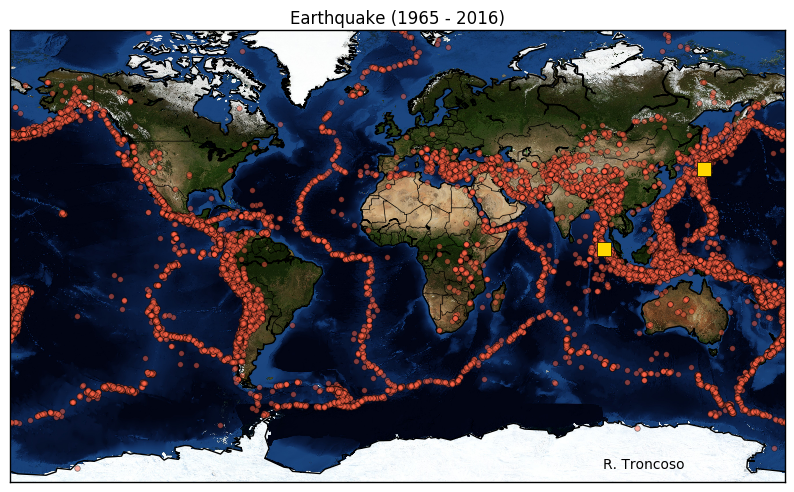

In [7]:
def creat_map(Type, size = 4):
    fig = plt.figure(figsize=(10, 10))
    fig.text(.8, .3, 'R. Troncoso', ha='right')
    m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
    m.drawcoastlines()
    m.drawcountries()
    #m.fillcontinents(color='burlywood',lake_color='lightblue', zorder = 1)
    m.bluemarble()
    #m.drawmapboundary(fill_color='lightblue')

    x, y = m(list(data[data.Type == Type].Longitude), list(data[data.Type == Type].Latitude))
    points = m.plot(x, y, "o", markersize = size, color = 'tomato', alpha = .5)
    if Type is 'Earthquake':
        a,b = m(list(data[(data.Type == Type) & (data.Magnitude == data.Magnitude.max())].Longitude), list(data[(data.Type == Type) & (data.Magnitude == data.Magnitude.max())].Latitude))
        points = m.plot(a, b, "s", markersize = 10, color = 'gold', alpha = 1)

    plt.title("{} (1965 - 2016)".format(Type))
    plt.legend(loc ='lower left', prop= {'size':11})
    plt.show()
creat_map('Earthquake')

** Here we see where Earthquakes generally occur most, along plate bounderies. The largest earthquakes occured where I have placed a yellow boxes. **

In [8]:
print('Largest Earthquake in the last 50 years:\n Magnitude: {}'\
    .format(data[data.Type == 'Earthquake'].Magnitude.max()))

Largest Earthquake in the last 50 years:
 Magnitude: 9.1


In [9]:
def get_points(year, Type):
    points = data[['Year', 'Latitude', 'Longitude', 'Magnitude']][(data.Year <= year) & (data.Type == Type)]
    return(points)

In [10]:
def create_animation(Type):
    fig = plt.figure(figsize=(10, 10))
    fig.text(.8, .3, 'R. Troncoso', ha='right')
    fig.suptitle('Major {} Activity (1965 - 2016)'.format(Type))
    cmap = plt.get_cmap('coolwarm')

    m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
    m.drawcoastlines()
    m.drawcountries()
    m.fillcontinents(color='burlywood',lake_color='lightblue', zorder = 1)
    m.drawmapboundary(fill_color='lightblue')

    START_YEAR = 1965
    LAST_YEAR = 2016

    points = get_points(START_YEAR, Type)
    x, y= m(list(points['Longitude']), list(points['Latitude']))
    scat = m.scatter(x, y, marker='o', zorder=10, cmap = cmap, alpha = .3)
    year_text = plt.text(-170, 80, str(START_YEAR),fontsize=15)
    plt.close()

    def update(frame_number):
        current_year = START_YEAR + (frame_number % (LAST_YEAR - START_YEAR + 1))
        points = get_points(current_year, Type)
        size = (points['Magnitude'] - 5)**4
        color = points['Magnitude'] - points['Magnitude'].mean()
        x, y = m(list(points['Longitude']), list(points['Latitude']))
        scat.set_offsets(np.dstack((x, y)))
        scat.set_color(cmap(color))
        scat.set_sizes(size)
        year_text.set_text(str(current_year))
    
    ani = animation.FuncAnimation(fig, update, interval=750, frames=LAST_YEAR - START_YEAR + 1)
    ani.save('{}.gif'.format(Type), writer='imagemagick', fps=2)


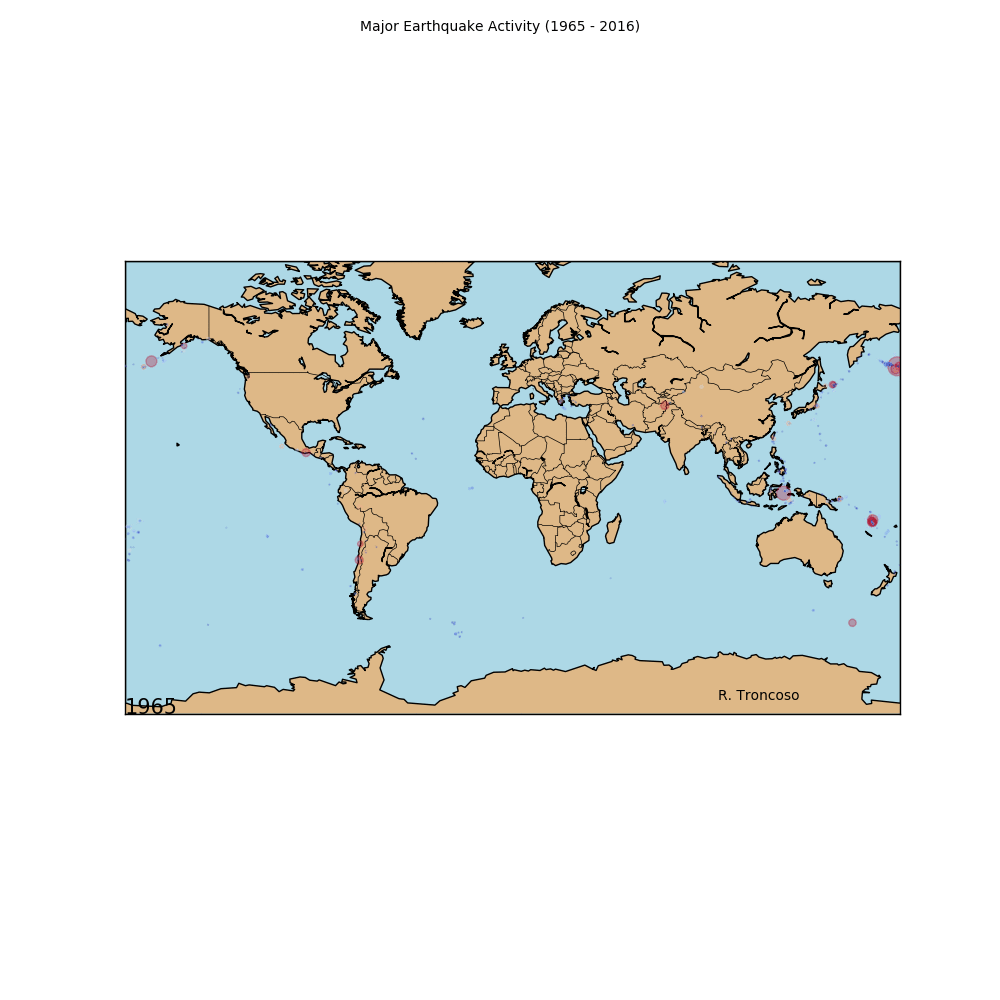

In [11]:
create_animation('Earthquake')

filename = 'Earthquake.gif'
video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))

# NUCLEAR EXPLOSIONS

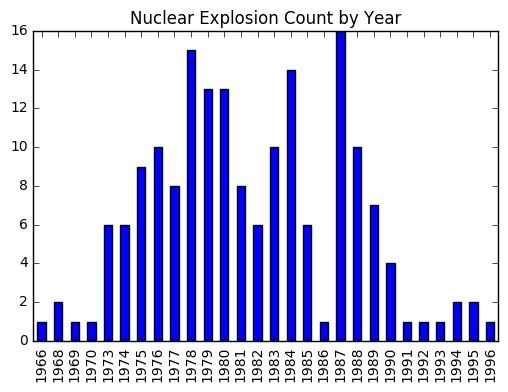

In [12]:
by_year('Nuclear Explosion', graph_type = 'bar')

** The two years that experienced the most nuclear explosions were 1978, and 1987. **

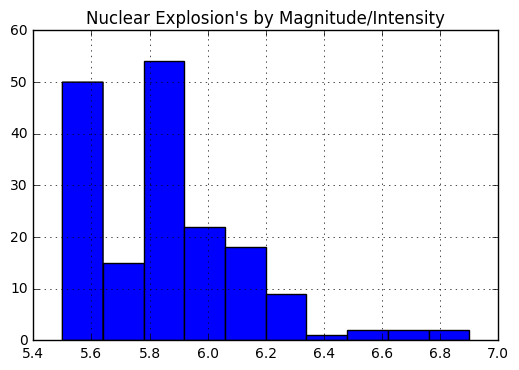

In [13]:
hist('Nuclear Explosion')

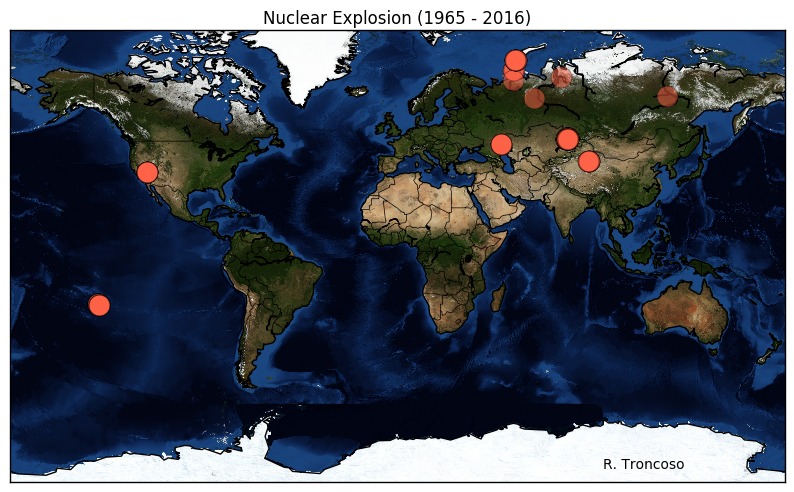

In [14]:
creat_map('Nuclear Explosion', size = 15)

** Here are the only places where there have been nuclear explosions within the last 50 years. **